In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Problem Statement (1)

# Basic Metrics (1 and 2)

In [14]:
data = pd.read_csv(r'F:\Muthu_2023\Personal\NextStep\DSCourse\Scaler\Business-Case-Study\Netflix\Dataset\netflix.csv')
#data = pd.read_csv(r'E:\NextStep\Scaler\Business-Case-Study\Netflix\Dataset\netflix.csv')

In [5]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


**Inference:**
- `No. of rows: 8807, No. of columns: 12`
- `All columns except release_year are of string type`

In [7]:
data.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


**Inference:**
- `Release year:`
    - `Only Release year is numerical variable and others are all categorical variable`
    - `Dataset contains movies from 1925 to 2021`
- `50% of Movies/shows present in netflix are released after 2017`

In [8]:
data.describe(include = 'object')

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,3207,1793,362,4


**Inference:**
- `Type: There are 2 types of videos: Movies and Shows`
- `Country: It needs further investigation as there are only 190 countries are recognised`
- `date_added: Movies are added mostly together on same days`

In [205]:
print(data[data['date_added'] == min(data['date_added'])][['title', 'release_year', 'date_added']])
print(data[data['release_year'] == min(data['release_year'])][['title', 'release_year', 'date_added']])

                     title  release_year date_added
5957  To and From New York          2006 2008-01-01
                                  title  release_year date_added
4250  Pioneers: First Women Filmmakers*          1925 2018-12-30


**Inference:**
- `The first movie added to Netflix was "To and From New York," released in 2006.`
- `The oldest movie currently on Netflix is "First Women Filmmakers," released in 1925`

# Missing Value Detection

In [8]:
data.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

**Inference:**
- `show_id, type, title, release_year, listed_in, description doesn't contain missing values`
- `date_added, rating and duration: Very few samples with missing values`
- `director: Almost 30% samples are having null values, needs further investigation`

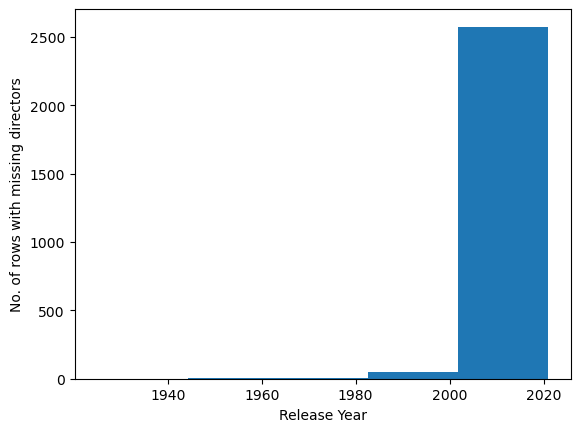

In [31]:
cnt, bins, _ = plt.hist(data[data['director'].isna()]['release_year'], bins = 5)
plt.xlabel('Release Year')
plt.ylabel('No. of rows with missing directors')
plt.show()
# Inference: 
# 

**Inference:**
`Samples with movies/shows released after 2000 are having missing director names`

In [27]:
plt.bar(np.arange(len(cnt)), cnt*100/cnt.sum())

(array([1.000e+00, 2.000e+00, 8.000e+00, 4.900e+01, 2.574e+03]),
 array([1925. , 1944.2, 1963.4, 1982.6, 2001.8, 2021. ]))

# Non Graphical Analysis of Columns

In [9]:
data.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

**Inference:**
- `show_id, title contains all unique values that makes sense`
- `director: All unique values with some missing values`
- `description: Interestingly there are some duplicates in description that needs to be explored`

## Detailed Analysis of Cast 

In [53]:
data['cast_list'] = data['cast'].str.split(',')
data_cast_exp = data[['show_id', 'type', 'cast_list']].explode('cast_list')
data_cast_exp['cast_list'] = data_cast_exp['cast_list'].str.strip()
data_cast_exp.nunique()

show_id       8807
type             2
cast_list    36439
dtype: int64

**Inference:**
`36439 Actors names where listed in the cast, individually analysis everyone is infeasible`

In [55]:
data_cast_exp['cast_list'].value_counts()

cast_list
Anupam Kher                43
Shah Rukh Khan             35
Julie Tejwani              33
Naseeruddin Shah           32
Takahiro Sakurai           32
                           ..
Maryam Zaree                1
Melanie Straub              1
Gabriela Maria Schmeide     1
Helena Zengel               1
Chittaranjan Tripathy       1
Name: count, Length: 36439, dtype: int64

**Inference:**
`Anupam Kher's and Shah rukh khan's movies and shows are popular (most) in netflix`

## Detailed Analysis of Country 

In [32]:
data['country_list'] = data['country'].str.split(',')
data_cntr_exp = data[['show_id', 'type', 'country_list']].explode('country_list')
data_cntr_exp['country_list'] = data_cntr_exp['country_list'].str.strip()
data_cntr_exp.nunique()

show_id         8807
type               2
country_list     123
dtype: int64

**Inference:**
`Netflix has movies released from 123 countries`

In [34]:
data_cntr_exp['country_list'].value_counts()

country_list
United States     3690
India             1046
United Kingdom     806
Canada             445
France             393
                  ... 
Ecuador              1
Armenia              1
Mongolia             1
Bahamas              1
Montenegro           1
Name: count, Length: 123, dtype: int64

**Inference:**
`Netflix has listed the majority of the movies and shows from United States`

## Detailed Analysis of Genre (Listed in) 

In [86]:
data['genre'] = data['listed_in'].str.split(',')
data_exp_gen = data[['show_id','type', 'genre']].explode('genre')
data_exp_gen['genre'] = data_exp_gen['genre'].str.strip()
data_exp_gen['genre'].nunique()

42

**Inference:**
`Movies and TV shows are listed under 42 different type of genres `

In [87]:
data_exp_gen['genre'].unique()

array(['Documentaries', 'International TV Shows', 'TV Dramas',
       'TV Mysteries', 'Crime TV Shows', 'TV Action & Adventure',
       'Docuseries', 'Reality TV', 'Romantic TV Shows', 'TV Comedies',
       'TV Horror', 'Children & Family Movies', 'Dramas',
       'Independent Movies', 'International Movies', 'British TV Shows',
       'Comedies', 'Spanish-Language TV Shows', 'Thrillers',
       'Romantic Movies', 'Music & Musicals', 'Horror Movies',
       'Sci-Fi & Fantasy', 'TV Thrillers', "Kids' TV",
       'Action & Adventure', 'TV Sci-Fi & Fantasy', 'Classic Movies',
       'Anime Features', 'Sports Movies', 'Anime Series',
       'Korean TV Shows', 'Science & Nature TV', 'Teen TV Shows',
       'Cult Movies', 'TV Shows', 'Faith & Spirituality', 'LGBTQ Movies',
       'Stand-Up Comedy', 'Movies', 'Stand-Up Comedy & Talk Shows',
       'Classic & Cult TV'], dtype=object)

**Inference:**
`There are common genre between movies and TV shows such as Documentaries for movies and docuseries for tv shows.
In further analysis, combining such names to a common name for both movies and shows, helps to understand the genre better`

In [88]:
data_exp_gen['genre_comb'] = data_exp_gen['genre'].str.lower()
data_exp_gen['genre_comb'] = data_exp_gen['genre_comb'].str.replace('tv', '').str.replace('shows', '').str.replace('movies', '').str.strip()
data_exp_gen['genre_comb'] = data_exp_gen['genre_comb'].str.replace('docuseries', 'documentaries').str.replace('series', '').str.replace('features', '').str.replace('& talk', '').str.strip()

- `Removed 'Movies' and 'TV' text from genre`
- `Merged Docuseries and documentaries`

In [93]:
print('No. of genre:', data_exp_gen['genre_comb'].nunique())
print(data_exp_gen['genre_comb'].unique())

No. of genre: 30
['documentaries' 'international' 'dramas' 'mysteries' 'crime'
 'action & adventure' 'reality' 'romantic' 'comedies' 'horror'
 'children & family' 'independent' 'british' 'spanish-language'
 'thrillers' 'music & musicals' 'sci-fi & fantasy' "kids'" 'classic'
 'anime' 'sports' 'korean' 'science & nature' 'teen' 'cult' ''
 'faith & spirituality' 'lgbtq' 'stand-up comedy' 'classic & cult']


**Inference:**
`Genre of movies and tv shows are combined to 30 from 42 and the list is shown above`

## Detailed Analysis of Rating

In [95]:
data['rating'].nunique()

17

In [97]:
data['rating'].value_counts()

rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64

**Inference:**
- `17 unique rating categories exist`
- `74min, 84min, 66min are seems to be outliers`
- `Predominant of movies and tv shows are not suitable for children under 14`

## Detailed Analysis of Duration

In [99]:
data[data['type'] == 'Movie']['duration'].unique(), data[data['type'] != 'Movie']['duration'].unique()

(array(['90 min', '91 min', '125 min', '104 min', '127 min', '67 min',
        '94 min', '161 min', '61 min', '166 min', '147 min', '103 min',
        '97 min', '106 min', '111 min', '110 min', '105 min', '96 min',
        '124 min', '116 min', '98 min', '23 min', '115 min', '122 min',
        '99 min', '88 min', '100 min', '102 min', '93 min', '95 min',
        '85 min', '83 min', '113 min', '13 min', '182 min', '48 min',
        '145 min', '87 min', '92 min', '80 min', '117 min', '128 min',
        '119 min', '143 min', '114 min', '118 min', '108 min', '63 min',
        '121 min', '142 min', '154 min', '120 min', '82 min', '109 min',
        '101 min', '86 min', '229 min', '76 min', '89 min', '156 min',
        '112 min', '107 min', '129 min', '135 min', '136 min', '165 min',
        '150 min', '133 min', '70 min', '84 min', '140 min', '78 min',
        '64 min', '59 min', '139 min', '69 min', '148 min', '189 min',
        '141 min', '130 min', '138 min', '81 min', '132 min', '123 mi

**Inference:**
- `Duration of Movies: Represented in minutes`
- `Duration of TV Shows: Represented in seasons`

In [181]:
dur_movie = data[data['type'] == 'Movie']
dur_movie['dur'] = dur_movie['duration'].str.split()
dur_movie['dur'] = dur_movie['dur'].str[0]
dur_movie['dur'] = dur_movie['dur'].astype('float64')
dur_movie[~dur_movie['dur'].isna()]['dur'].describe()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_4880\1707604282.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dur_movie['dur'] = dur_movie['duration'].str.split()
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_4880\1707604282.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dur_movie['dur'] = dur_movie['dur'].str[0]
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_4880\1707604282.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

count    6128.000000
mean       99.577187
std        28.290593
min         3.000000
25%        87.000000
50%        98.000000
75%       114.000000
max       312.000000
Name: dur, dtype: float64

**Inference:**
`Duration of Movies in netflix ranges from 3 minutes to 312 minutes`

In [182]:
dur_show = data[data['type'] != 'Movie']
dur_show['dur'] = dur_show['duration'].str.split()
dur_show['dur'] = dur_show['dur'].str[0]
dur_show['dur'] = dur_show['dur'].astype('float64')
dur_show[~dur_show['dur'].isna()]['dur'].describe()
# All movies are represented in minutes

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_4880\1543813386.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dur_show['dur'] = dur_show['duration'].str.split()
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_4880\1543813386.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dur_show['dur'] = dur_show['dur'].str[0]
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_4880\1543813386.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

count    2676.000000
mean        1.764948
std         1.582752
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        17.000000
Name: dur, dtype: float64

**Inference:** `Duration of TV shows in netflix ranges from 1 season to 17 seasons`

## Detailed Analysis of Description

In [85]:
data_desc_dup = data[data['description'].duplicated(keep=False)]
data_desc_dup.groupby('description')['title'].apply(lambda x: ','.join(x)).reset_index()

,description,title
0,A budding politician has devious plans to rise...,"Tughlaq Durbar,Tughlaq Durbar (Telugu)"
1,A scheming matriarch plots to cut off her disa...,"Together For Eternity,Hum Saath-Saath Hain"
2,A surly septuagenarian gets another chance at ...,"Oh! Baby (Malayalam),Oh! Baby (Tamil),Oh! Baby"
3,A young Han Solo tries to settle an old score ...,"Solo: A Star Wars Story,Solo: A Star Wars Stor..."
4,"After devastating terror attacks in Norway, a ...","22 July,22-Jul"
5,After growing up enduring criticism from his f...,"Angu Vaikuntapurathu (Malayalam),Ala Vaikuntha..."
6,"An affable, newly appointed college warden pro...","Petta (Telugu Version),Petta"
7,An aspiring musician battles age-old caste div...,"Sarvam Thaala Mayam (Telugu Version),Sarvam Th..."
8,"As a blind librarian, dispirited cricketer and...","Andhaghaaram,Andhakaaram"
9,"As a psychology professor faces Alzheimer's, h...","February 9,Feb-09"


**Inference:**
`Duplicate descriptions are due to the presence of multi lingual movies or Shows` 

# Graphical Analysis of Columns

## Type: Movies Vs TV Shows

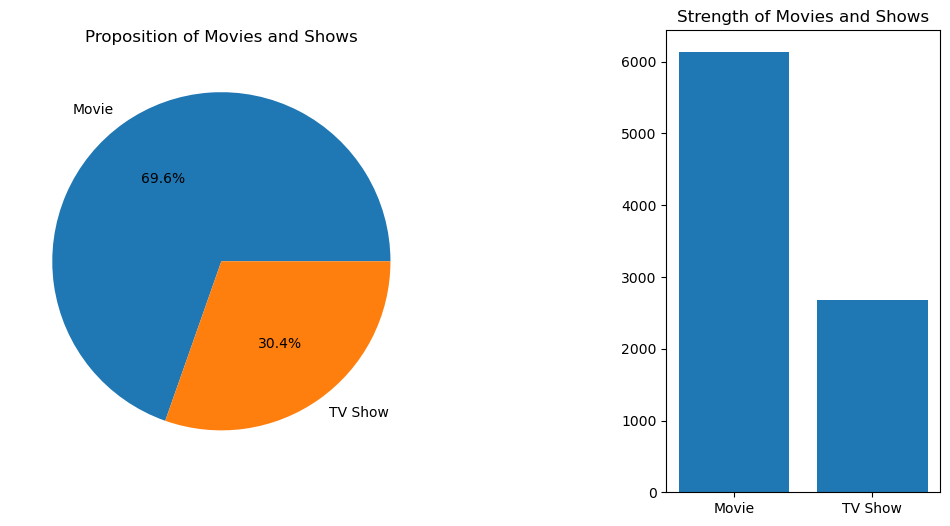

In [97]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.pie(data['type'].value_counts().reset_index()['count'], labels = list(data['type'].value_counts().index), autopct = '%0.1f%%')
plt.title('Proposition of Movies and Shows')
plt.subplot(1,3,3)
plt.bar(height = data['type'].value_counts().reset_index()['count'], x = list(data['type'].value_counts().index))
plt.title('Strength of Movies and Shows')
plt.show()

**Inference:** `Movies dominate over TV shows, comprising 70% compared to 30%`

## Director: Top 10 directors Movies and TV shows

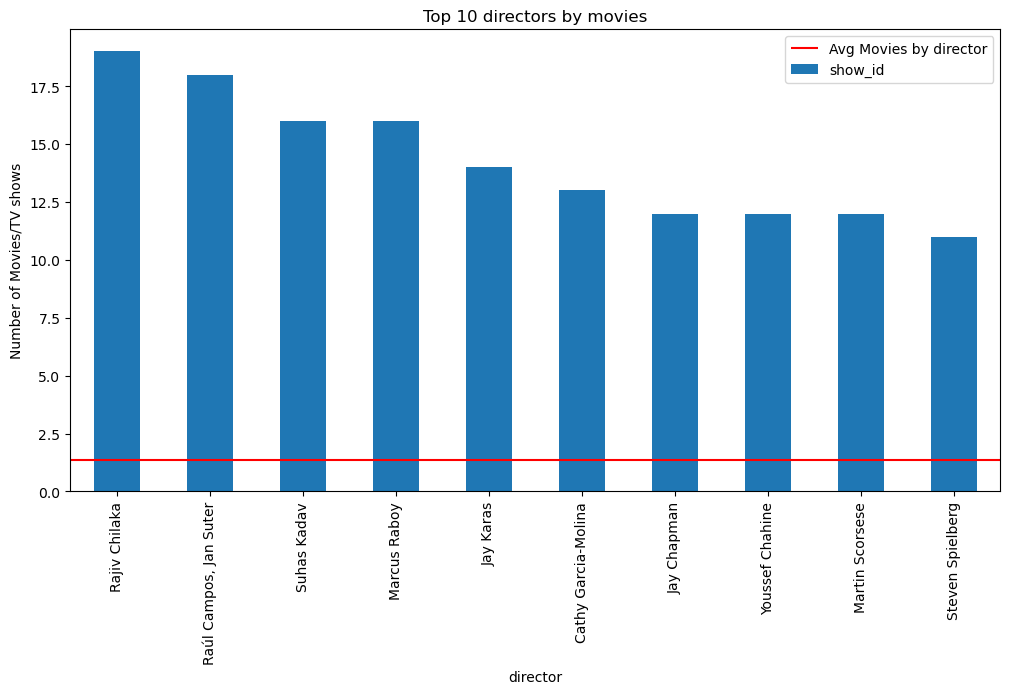

In [124]:
plt.figure(figsize=(12,6))
data_grp = data.groupby('director')['show_id'].count().sort_values(ascending=False)
data_grp.iloc[:10].plot(kind='bar')
plt.title('Top 10 directors by movies')
plt.ylabel('Number of Movies/TV shows')
plt.hlines(data_grp.mean(), -1, 10, color = 'r', label='Avg Movies by director')
plt.legend()
plt.show()

**Inference:** `Among the movies and TV shows listed on Netflix, Rajiv Chilaka stands out as the leading director with 18 movies`

## Release Year: Movies and TV Shows by Year

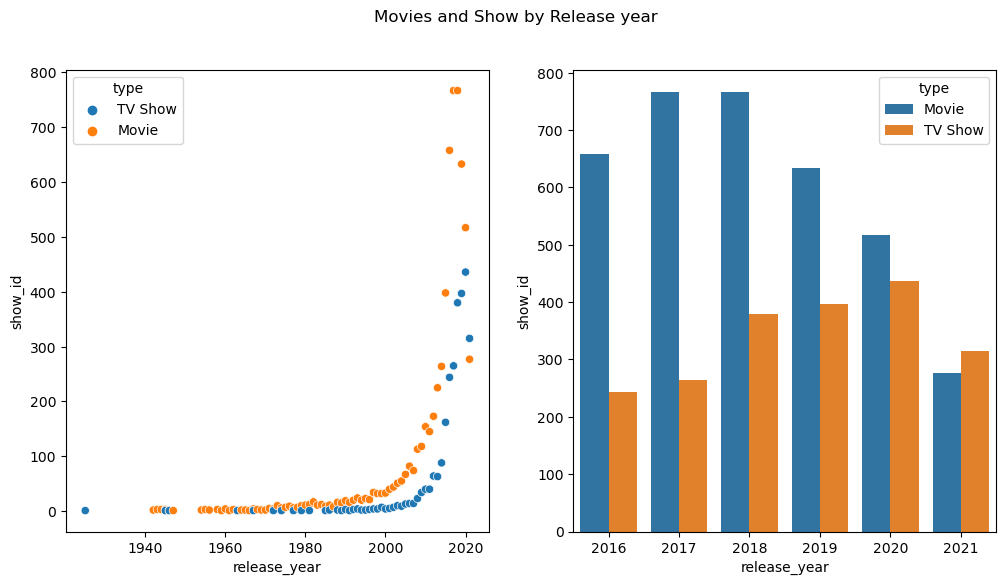

In [126]:
# Movies and Shows by year
plt.figure(figsize=(12,6)).suptitle('Movies and Show by Release year')
data_grp = data.groupby(['release_year', 'type'])['show_id'].count().reset_index()
plt.subplot(1,2,1)
sns.scatterplot(data = data_grp, x = 'release_year', y='show_id', hue = 'type')
plt.subplot(1,2,2)
sns.barplot(data = data_grp[data_grp['release_year'] > 2015], x = 'release_year', y='show_id', hue = 'type')
plt.show()

**Inference:**
- `Plot1: The majority of movies and shows available on Netflix were released after 2010`
- `Plot2: The strength of TV shows compared to movies is increasing towards the end, indicating a declining trend in the number of movies`

## Cast: Top 10 Actors in Movies and TV Shows

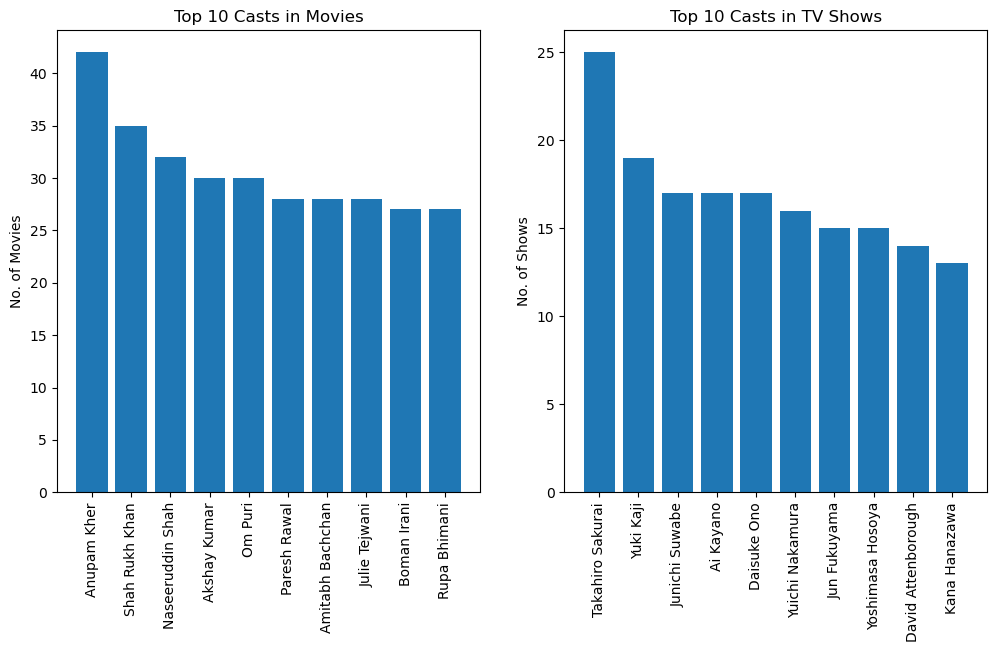

In [127]:
data_cast_grp = data_cast_exp.groupby('type')['cast_list'].value_counts()

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.bar(x = data_cast_grp['Movie'].index[:10], height = data_cast_grp['Movie'][:10])
plt.xticks(rotation = 90)
plt.ylabel('No. of Movies')
plt.title('Top 10 Casts in Movies')

plt.subplot(1,2,2)
plt.bar(x = data_cast_grp['TV Show'].index[:10], height = data_cast_grp['TV Show'][:10])
plt.xticks(rotation = 90)
plt.ylabel('No. of Shows')
plt.title('Top 10 Casts in TV Shows')

plt.show()

**Inference:**
- `Cast in Movies: `
    - `The Top actors are predominantly from India`
    - `Anupam kher and Shahrukh khan are the leading actors` 
- `Cast in Shows: `
    - `The Top actors are predominantly from Japan and Korea`

## Country: Movies and TV Shows by Country

In [130]:
data_country = pd.get_dummies(data_cntr_exp, columns =['country_list'])

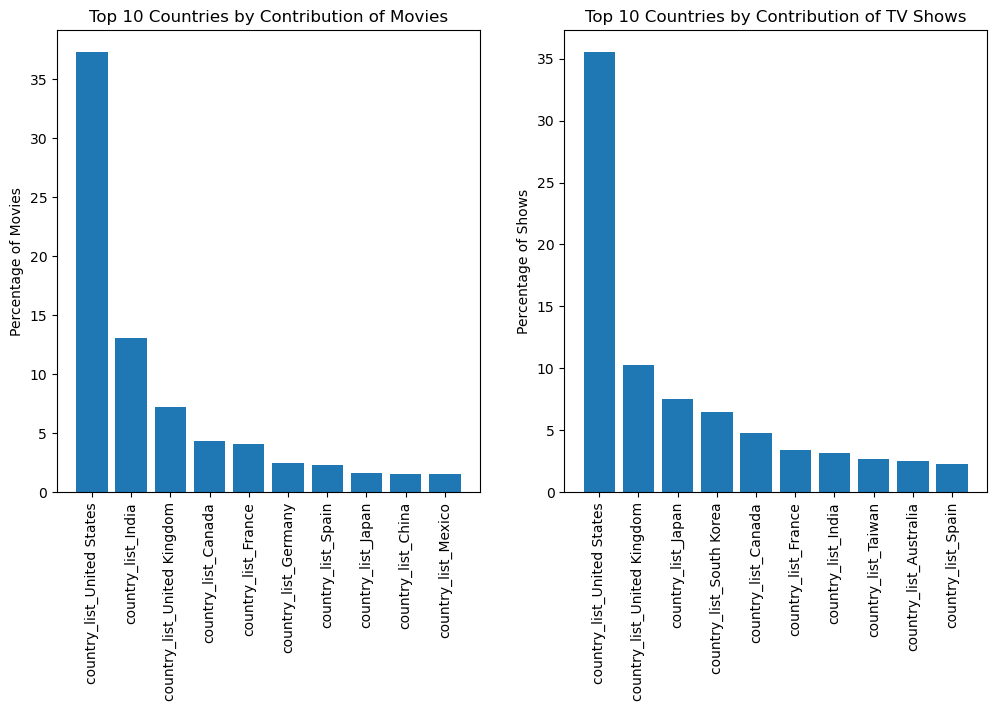

In [133]:
plt.figure(figsize=(12,6))
data_temp = data_country[data_country['type'] == 'Movie']
data_country_grp = (data_temp.iloc[:, 2:].sum() * 100/(data_temp.iloc[:, 2:].sum().sum())).sort_values(ascending=False)
plt.subplot(1,2,1)
plt.bar(x = data_country_grp.index[:10], height = data_country_grp[:10])
plt.xticks(rotation = 90)
plt.ylabel('Percentage of Movies')
plt.title('Top 10 Countries by Contribution of Movies')

data_temp = data_country[data_country['type'] != 'Movie']
data_country_grp = (data_temp.iloc[:, 2:].sum() * 100/(data_temp.iloc[:, 2:].sum().sum())).sort_values(ascending=False)
plt.subplot(1,2,2)
plt.bar(x = data_country_grp.index[:10], height = data_country_grp[:10])
plt.xticks(rotation = 90)
plt.ylabel('Percentage of Shows')
plt.title('Top 10 Countries by Contribution of TV Shows')
plt.show()

**Inference:**
- `35% of shows and movies are from United States`
- `While India is the second largest contributor of movies, it ranks 7th in the contribution of shows`
- `Japan and Korean series are more popular than their movies`

## Date_Added: 

In [135]:
data['date_added']  = pd.to_datetime(data['date_added'].str.strip())
data['date_added_mon'] = data['date_added'].dt.month_name()
data['date_added_yr'] = data['date_added'].dt.year
data['date_added_day'] = data['date_added'].dt.day
data['date_added_weekday'] = data['date_added'].dt.day_name()

### Addition of Movies by Month

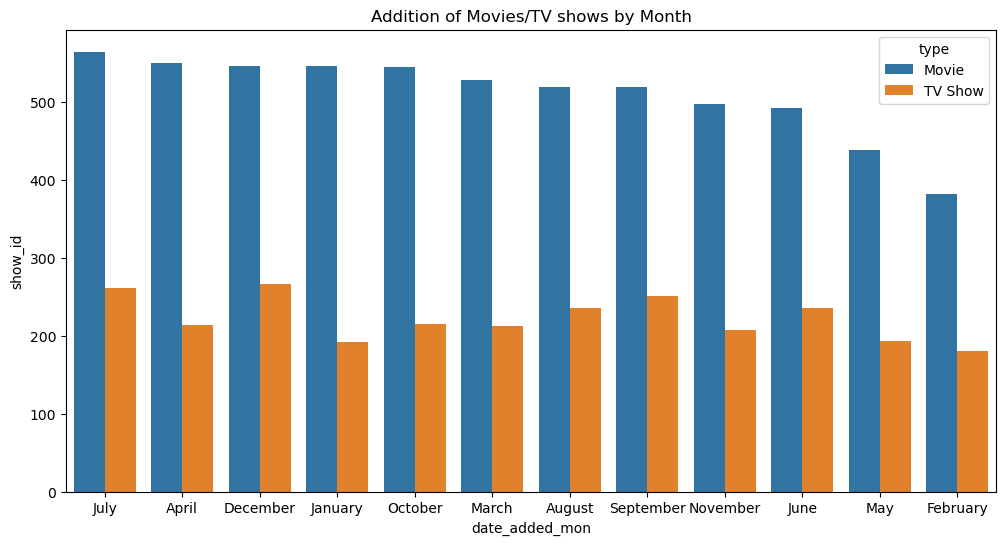

In [136]:
plt.figure(figsize=(12,6))
data_grp = data.groupby(['date_added_mon', 'type'])['show_id'].count().reset_index().sort_values(['type', 'show_id'], ascending = [True, False])
sns.barplot(data = data_grp, x = 'date_added_mon', y='show_id', hue = 'type')
plt.title('Addition of Movies/TV shows by Month')
plt.show()

**Inference:**
- `A large number of movies are added in July and April, while the majority of TV shows are added in July and September`

### Addition of Movies/TV Shows by day of month

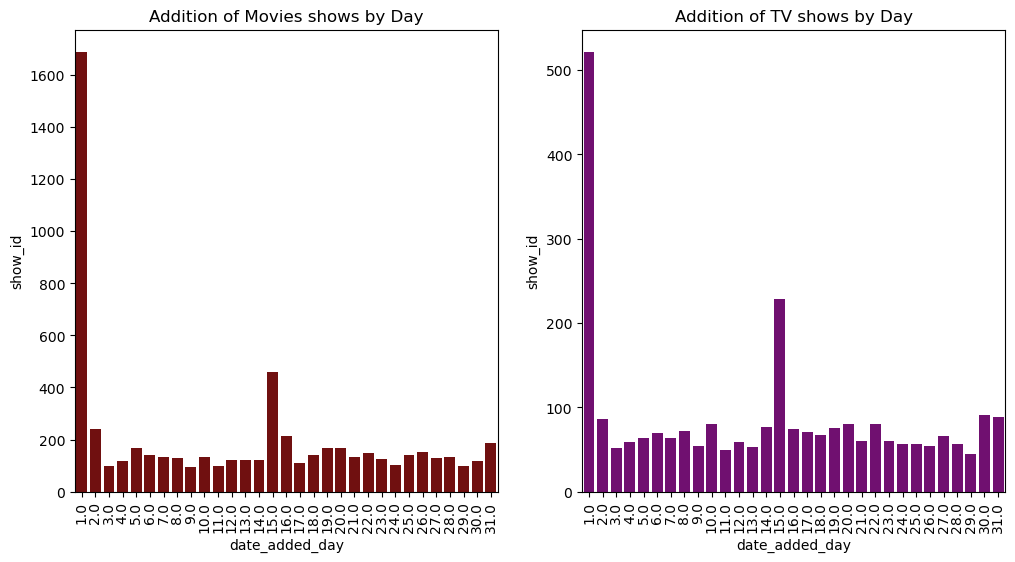

In [29]:
plt.figure(figsize=(12,6))
data_grp = data.groupby(['date_added_day', 'type'])['show_id'].count().reset_index()
plt.subplot(1,2,1)
sns.barplot(data = data_grp[data_grp['type'] == 'Movie'], x = 'date_added_day', y='show_id', color = 'maroon')#, hue = 'type')
plt.title('Addition of Movies shows by Day')
plt.xticks(rotation = 90)
plt.subplot(1,2,2)
sns.barplot(data = data_grp[data_grp['type'] != 'Movie'], x = 'date_added_day', y='show_id', color = 'purple')#, hue = 'type')
plt.title('Addition of TV shows by Day')
plt.xticks(rotation = 90)
plt.show()
# Both plots clearly depicts that major addition of movies/tv shows on start of the month and mid of the month

**Inference:**
`Both plots clearly depict that the majority of movies and TV shows are added at the beginning and middle of the month`

### Addition of Movies/TV Shows by week day

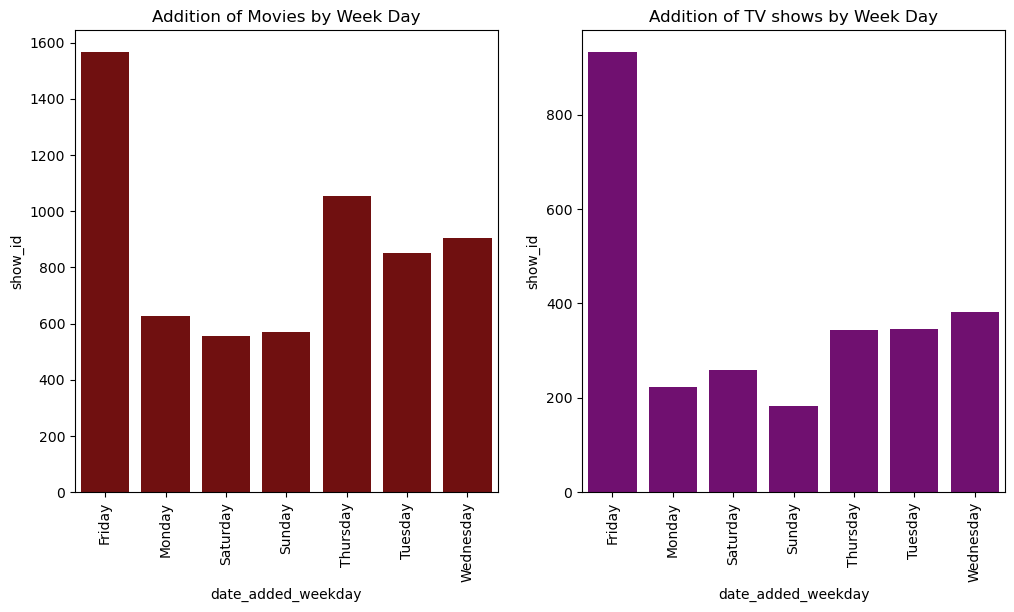

In [102]:
plt.figure(figsize=(12,6))

data_grp = data.groupby(['date_added_weekday', 'type'])['show_id'].count().reset_index()
plt.subplot(1,2,1)
sns.barplot(data = data_grp[data_grp['type'] == 'Movie'], x = 'date_added_weekday', y='show_id', color = 'maroon')#, hue = 'type')
plt.title('Addition of Movies by Week Day')
plt.xticks(rotation = 90)
plt.subplot(1,2,2)
sns.barplot(data = data_grp[data_grp['type'] != 'Movie'], x = 'date_added_weekday', y='show_id', color = 'purple')#, hue = 'type')
plt.title('Addition of TV shows by Week Day')
plt.xticks(rotation = 90)
plt.show()


**Inference:**
`It is clearly evident that the majority of movies and TV shows are added on Fridays, targeting the weekend audience`

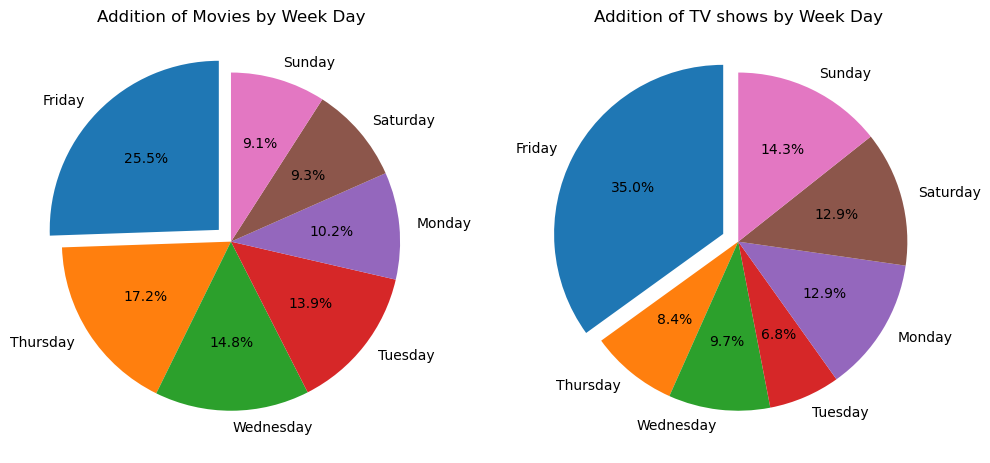

In [110]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.pie(data[data['type'] == 'Movie']['date_added_weekday'].value_counts(),#.sort_values(ascending=False), 
        labels = list(data['date_added_weekday'].value_counts().index), autopct='%0.1f%%', startangle = 90, explode=[0.1,0,0,0,0,0,0])
plt.title('Addition of Movies by Week Day')
plt.subplot(1,2,2)
plt.pie(data[data['type'] != 'Movie']['date_added_weekday'].value_counts(sort=False).sort_index(), #.sort_values(ascending=False), 
        labels = list(data['date_added_weekday'].value_counts().index), 
        autopct='%0.1f%%', startangle = 90, explode=[0.1,0,0,0,0,0,0])
plt.title('Addition of TV shows by Week Day')
plt.show()

**Inference:**
`In the detailed view, TV shows are predominantly added on Fridays, whereas movies are added on Thursdays and Fridays`

## Rating: Distribution of Movies and TV shows by Rating

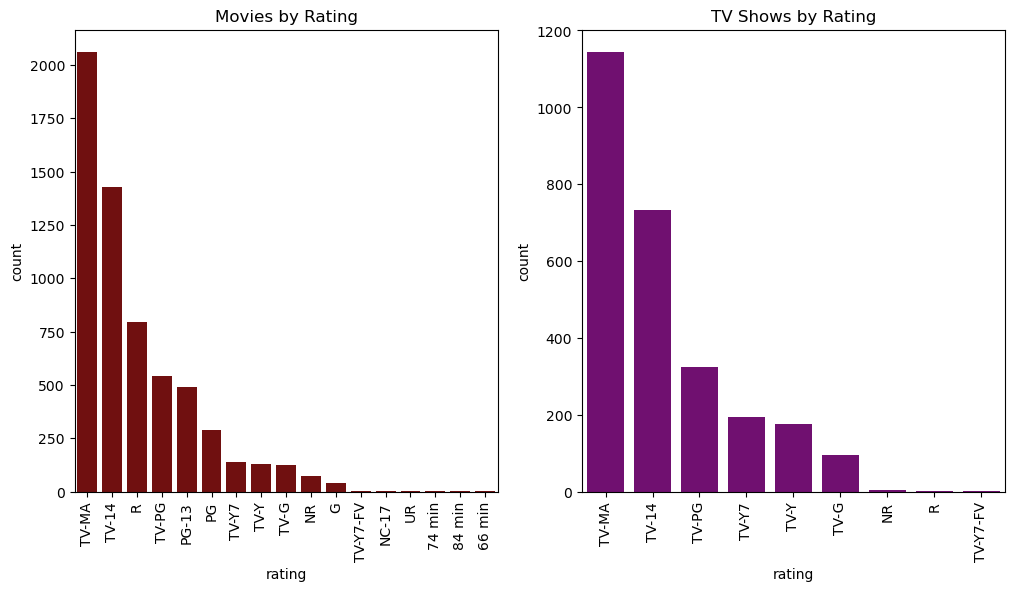

In [139]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.countplot(data = data[data['type'] == 'Movie'], x = 'rating', color = 'maroon', order = data[data['type'] == 'Movie']['rating'].value_counts().index)
plt.title('Movies by Rating')
plt.xticks(rotation = 90)
plt.subplot(1,2,2)
sns.countplot(data = data[data['type'] != 'Movie'], x = 'rating', color = 'purple', order = data[data['type'] != 'Movie']['rating'].value_counts().index)
plt.title('TV Shows by Rating')
plt.xticks(rotation = 90)
plt.show()

**Inference:**
- `The majority of movies on Netflix are rated TV-MA (Mature Audience) and TV-14 (Unsuitable for children under 14).`
- `Interestingly, 'R' rated TV shows are significantly fewer compared to 'R' rated movies, which typically contain adult content.`
- `Most of the movies and TV shows listed on Netflix are unsuitable for children.`

# Listed in (Genre): Movies and TV Shows by Genre

In [141]:
data_grp = pd.get_dummies(data_exp_gen, columns = ['genre'])

Text(0.5, 1.0, 'TV shows by Genre')

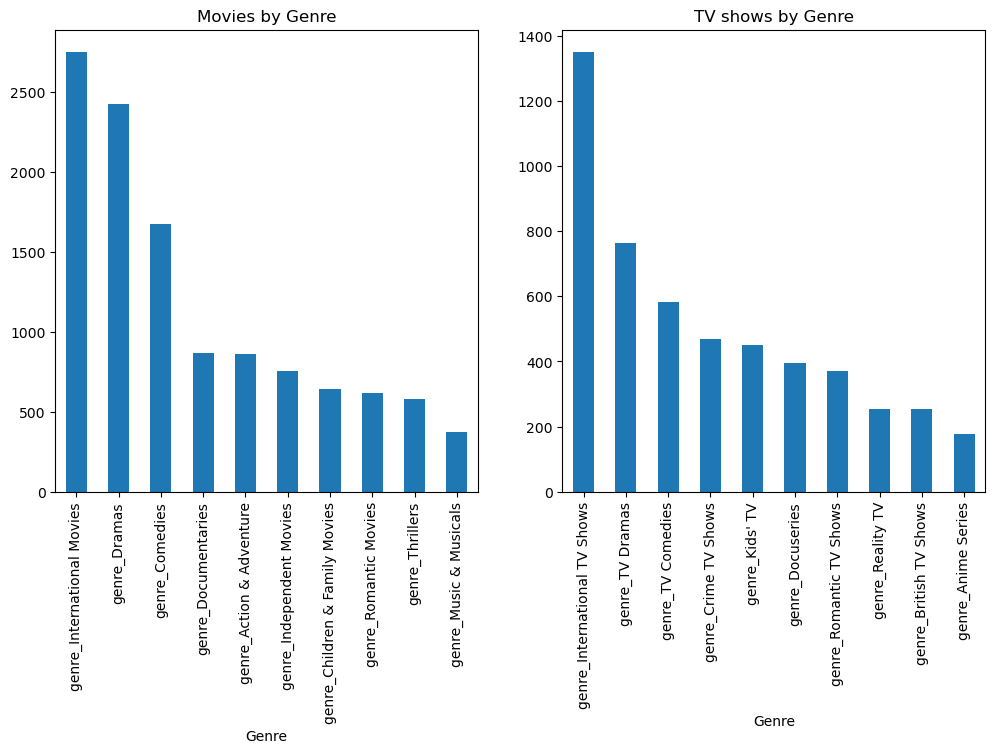

In [87]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
test = data_grp[data_grp['type'] == 'Movie'].drop('type', axis=1).groupby(['show_id']).sum()
test.sum(axis = 0).sort_values(ascending = False).iloc[:10].plot(kind='bar')
plt.xlabel('Genre')
plt.title('Top 10 Genre for Movies')
plt.subplot(1,2,2)
test = data_grp[data_grp['type'] != 'Movie'].drop('type', axis=1).groupby(['show_id']).sum()
test.sum(axis = 0).sort_values(ascending = False).iloc[:10].plot(kind='bar')
plt.xlabel('Genre')
plt.title('Top 10 Genre for TV shows')
# Most of the shows are International Movies/TV shows
# Most of the movies belong to Dramas and comedies genre

**Inference:**
- `Many of the shows on Netflix are categorized as International Movies/TV shows (non-US)`
- `The majority of movies on Netflix belong to the genres of Dramas and Comedies`

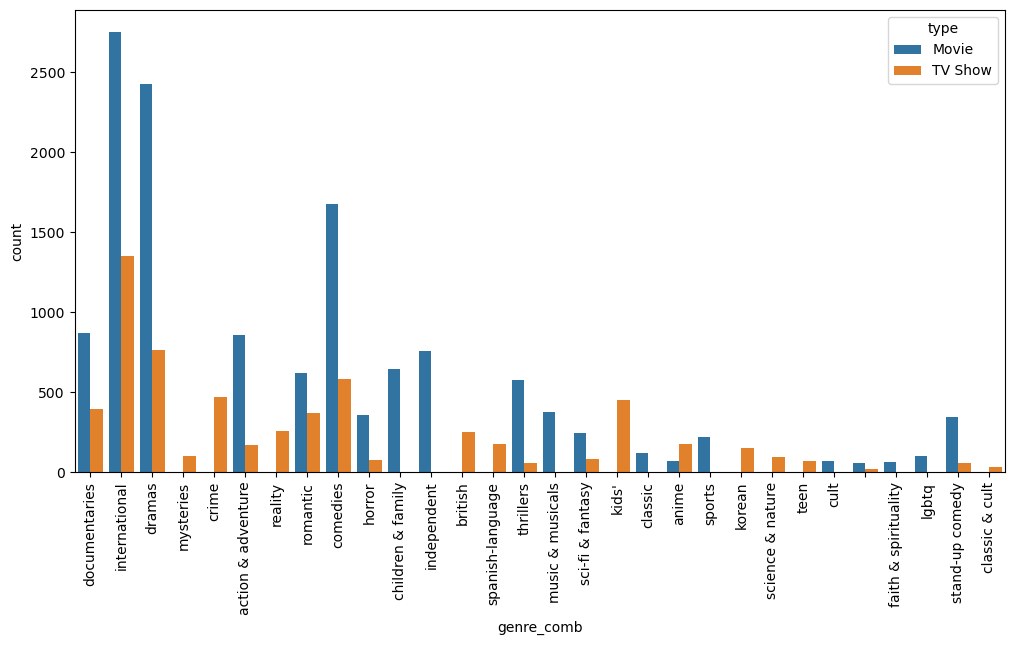

In [142]:
plt.figure(figsize=(12, 6))
sns.countplot(data = data_exp_gen, x = 'genre_comb', hue = 'type')
plt.xticks(rotation = 90);

**Inference:** 
- `After combining the genre between Movies and TV shows`
    - `Both of them are categorized in Dramas and Comedies`

## Duration

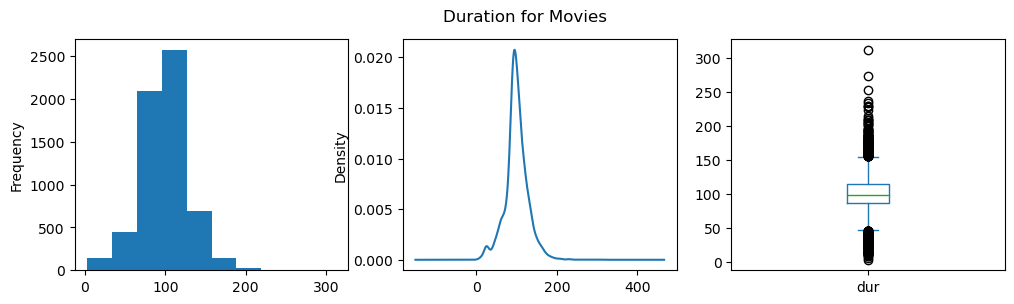

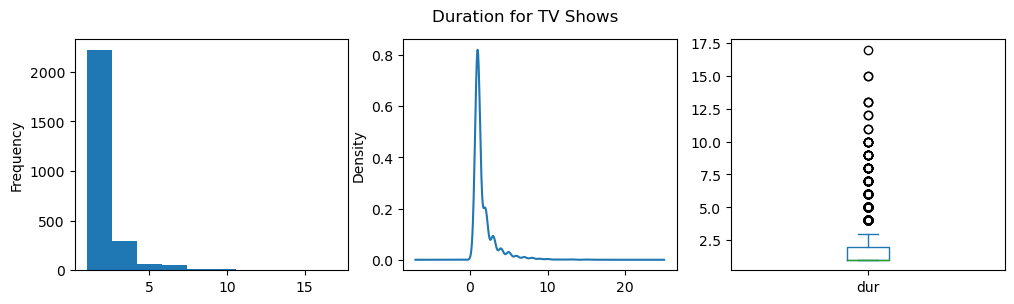

In [184]:
plt.figure(figsize=(12,3)).suptitle('Duration for Movies')
plt.subplot(1,3,1)
dur_movie['dur'].plot(kind='hist')
plt.subplot(1,3,2)
dur_movie['dur'].plot(kind='kde')
plt.subplot(1,3,3)
dur_movie['dur'].plot(kind='box')

#dur_show = data[data['type'] != 'Movie']['duration'].str.split()
plt.figure(figsize=(12,3)).suptitle('Duration for TV Shows')
plt.subplot(1,3,1)
dur_show['dur'].plot(kind='hist')
plt.subplot(1,3,2)
dur_show['dur'].plot(kind='kde')
plt.subplot(1,3,3)
dur_show['dur'].plot(kind='box')

plt.show()

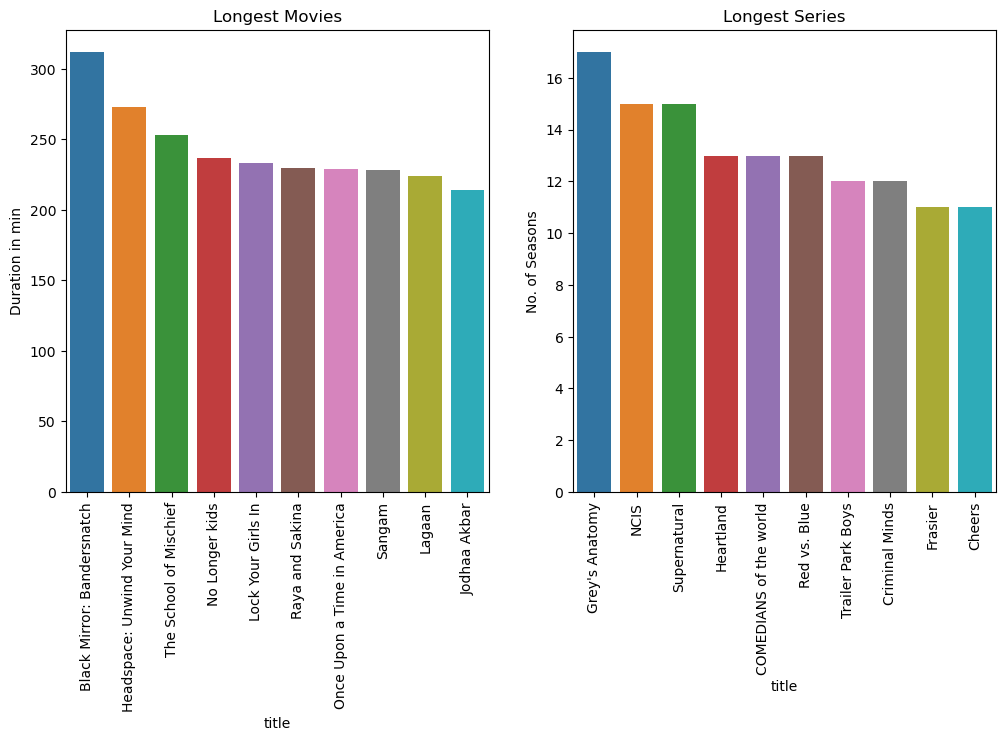

In [185]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
dur_movie = dur_movie.sort_values('dur', ascending = False)
sns.barplot(data = dur_movie[:10], x = 'title', y = 'dur')
plt.xticks(rotation = 90)
plt.ylabel('Duration in min')
plt.title('Longest Movies')

plt.subplot(1,2,2)
dur_show = dur_show.sort_values('dur', ascending = False)
sns.barplot(data = dur_show[:10], x = 'title', y = 'dur')
plt.xticks(rotation = 90)
plt.ylabel('No. of Seasons')
plt.title('Longest Series')
plt.show()

# Bivariate Analysis

# Multi variate Analysis

In [186]:
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'country_list', 'cast_list', 'genre', 'date_added_mon', 'date_added_yr',
       'date_added_day', 'date_added_weekday'],
      dtype='object')

In [187]:
data_mod = data.drop(['cast', 'country', 'date_added', 'listed_in'], axis = 1)

In [188]:
sns.heatmap(data_mod.corr())

ValueError: could not convert string to float: 's1'

In [193]:
data['n_cast'] = data['cast_list'].dropna().apply(len)

In [194]:
data['n_country'] = data['country_list'].dropna().apply(len)

In [195]:
data['n_genre'] = data['genre'].dropna().apply(len)

<Axes: >

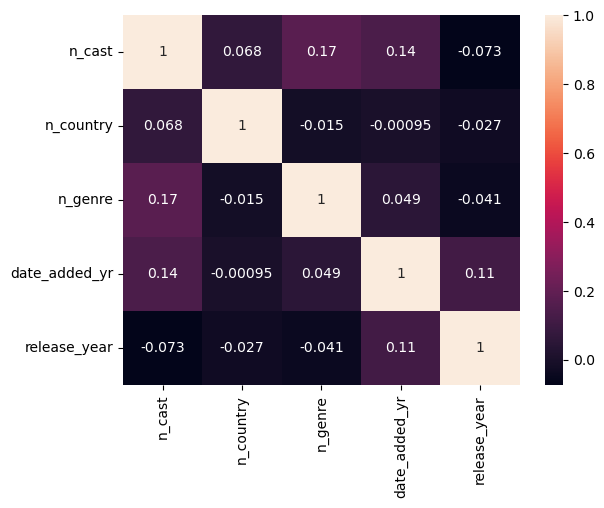

In [200]:
sns.heatmap(data[['n_cast', 'n_country', 'n_genre', 'date_added_yr', 'release_year']].corr(), annot=True)

C:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


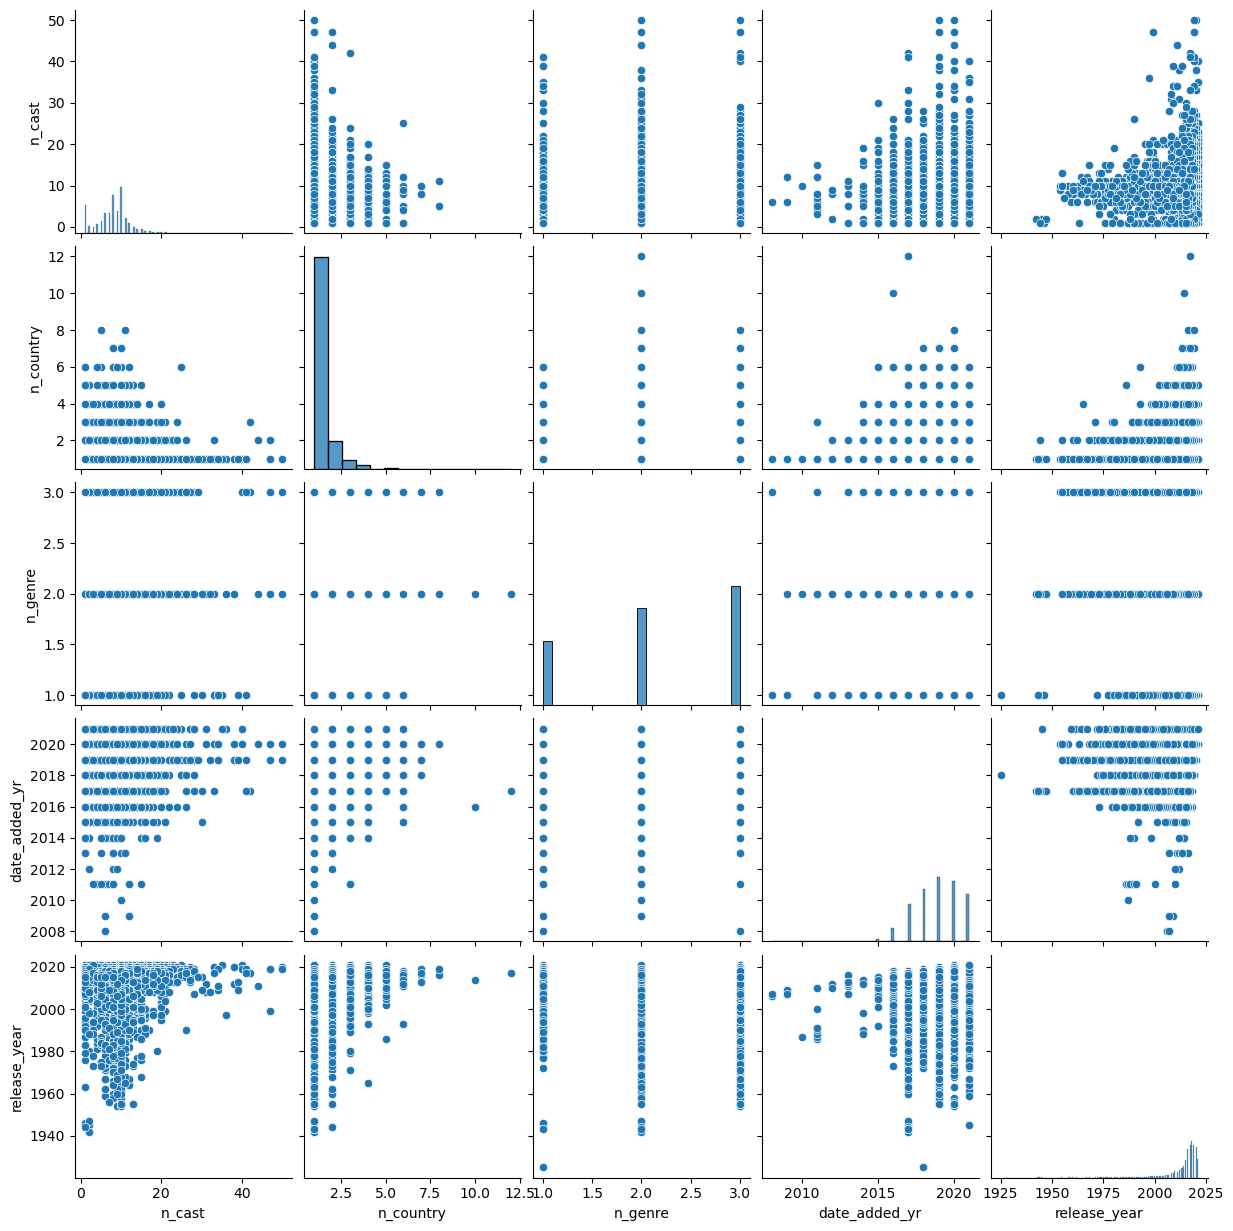

In [201]:
sns.pairplot(data[['n_cast', 'n_country', 'n_genre', 'date_added_yr', 'release_year']])